# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span><b>Principal objetivo:</b> A entrega de um modelo que seja capaz de prever com precisão máxima a renda de um indivíduo levando em consideração diversos fatores sobre o mesmo.</span>

<span><b>O recurso principal para realizar a previsão se trata de um Dataset com diversas variáveis explicativas.</b></span>

<span><b>Os principais interessados na realização da previsão de renda podem ser:</b> Seguradoras, Bancos e outras instituições financeiras.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span> A princípio, os dados são compostos por 13 variáveis independentes, ou seja, que serão utilizadas com o único objetivo de melhorar a análise e a previsibilidade do nosso modelo e 1 variável dependente (renda) que será a variável que o modelo tentará prever baseado nas informação providas pelas variáveis independentes.</span>


### Dicionário de dados

<span>Abaixo se encontra um dicionário completo dos dados iniciais do nosso dataset principal, incluindo o nome das variáveis, descrição e o tipo da variável.</span>

<span>Vale mencionar também que os dados apresentados abaixo poderão sofrer alterações de tipo, ou contar com a remoção de algumas dessas variáveis para o melhor desempenho do modelo.</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data da coleta dos dados                                      | datatime|
| id_cliente              |  ID único do cliente em questão                                      | int|
| sexo                    |  Sexo do cliente em questão                                      | object|
| posse_de_veiculo        |  Posse de veículo próprio ou não                                     | bool|
| posse_de_imovel         |  Posse de imóvel próprio ou não                                     | bool|
| qtd_filhos              |  A quantidade de filhos que o cliente possui                                      | int|
| tipo_renda              |  Empresário, Assalariado, Servidor Público, Pensionista ou Bolsista                                      | object|
| educacao                |  Primário, Secundário, Superior Incompleto, Superior Completo, ou Pós Graduação                                      | object|
| estado_civil            |  Solteiro, Casado, Viúvo, União ou Separado                                      | object|
| tipo_residencia         |  Casa, Governamental, Com os pais, Aluguel, Estúdio ou Comunitário                                      | object|
| idade                   |  Idade do cliente em questão                                      | int|
| tempo_emprego           |  Tempo de emprego (em anos) do cliente em questão                                      | float|
| qt_pessoas_residencia   |  Quantidade de pessoas vivendo na residência do cliente em questão                                      | float|
| renda                   |  Renda do cliente em questão (Variável dependente)                                      | float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [1]:
import ydata_profiling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Aqui, estamos utilizando a biblioteca ydata-profiling para um primeiro contato com o DataSet, desta maneira podemos realizar uma limpeza inicial.

In [3]:
%%capture
(ProfileReport(renda, title="Profiling Report Renda", explorative=True, minimal=True)
        .to_file("./output/report_renda.html"))

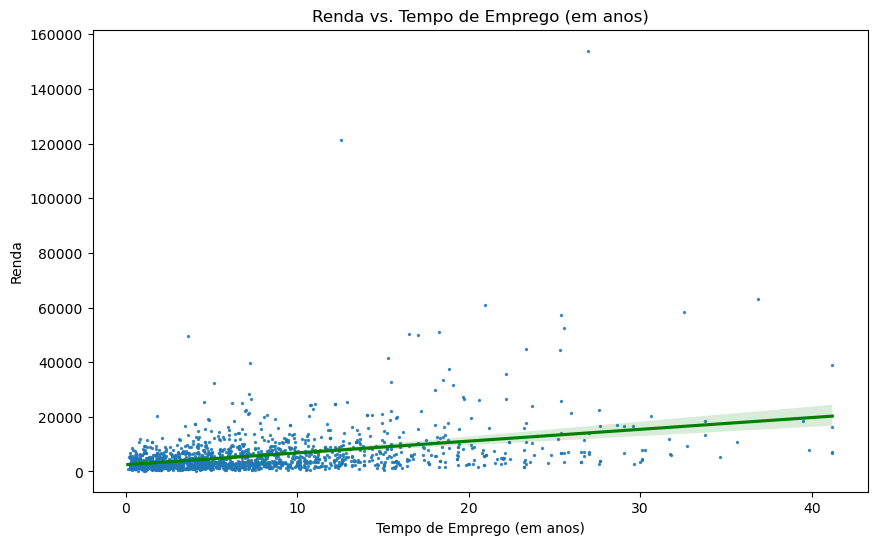

In [4]:
plt.figure(figsize=(10, 6))
sns.regplot(y = 'renda', x = 'tempo_emprego', data = renda.head(2000), scatter_kws={'s': 2}, line_kws={'color': 'green'})
plt.title('Renda vs. Tempo de Emprego (em anos)')
plt.xlabel('Tempo de Emprego (em anos)')
plt.ylabel('Renda')
plt.show()

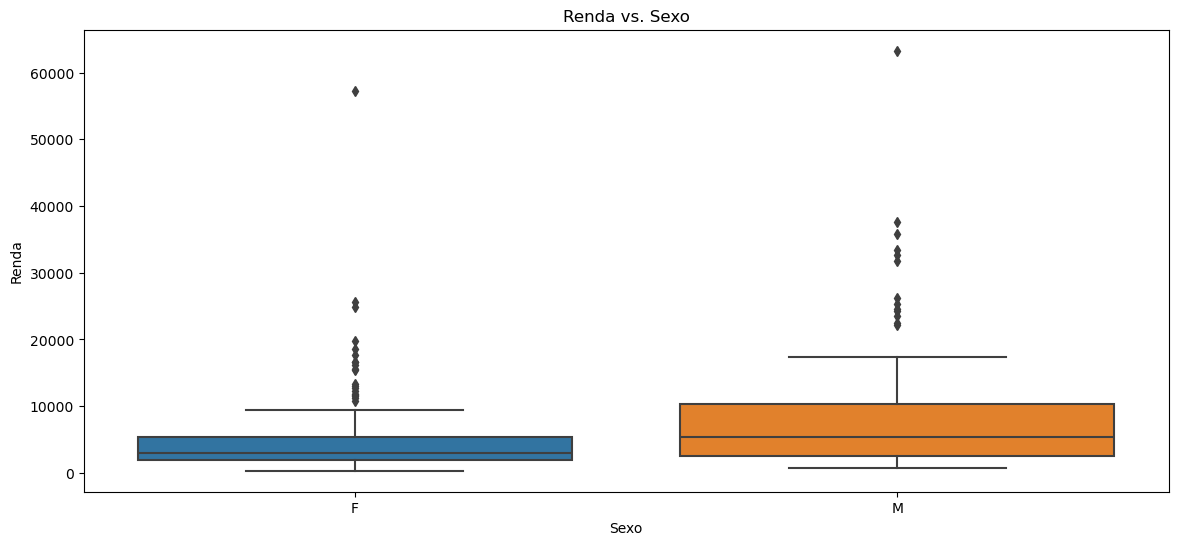

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='sexo', y='renda', data=renda.head(400))
plt.title('Renda vs. Sexo')
plt.xlabel('Sexo')
plt.ylabel('Renda')
plt.show()

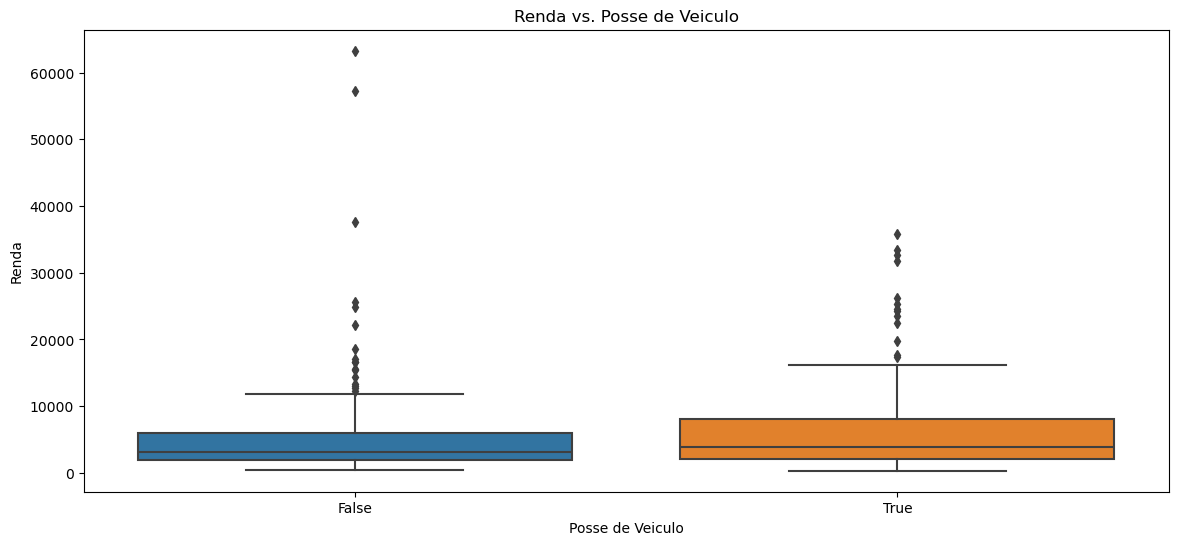

In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='posse_de_veiculo', y='renda', data=renda.head(400))
plt.title('Renda vs. Posse de Veiculo')
plt.xlabel('Posse de Veiculo')
plt.ylabel('Renda')
plt.show()

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




Para uma análise Bivariada dos nossos dados, podemos criar um heatmap que captura a corelação entre as diversas variáveis que possuímos.


In [7]:
numeric_bool_df = renda.select_dtypes(include=['number', 'bool'])
numeric_bool_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_bool_df.dropna(inplace=True)
numeric_bool_df = numeric_bool_df.astype(int)
correlation_matrix = numeric_bool_df.corr()

In [8]:
correlation_matrix.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

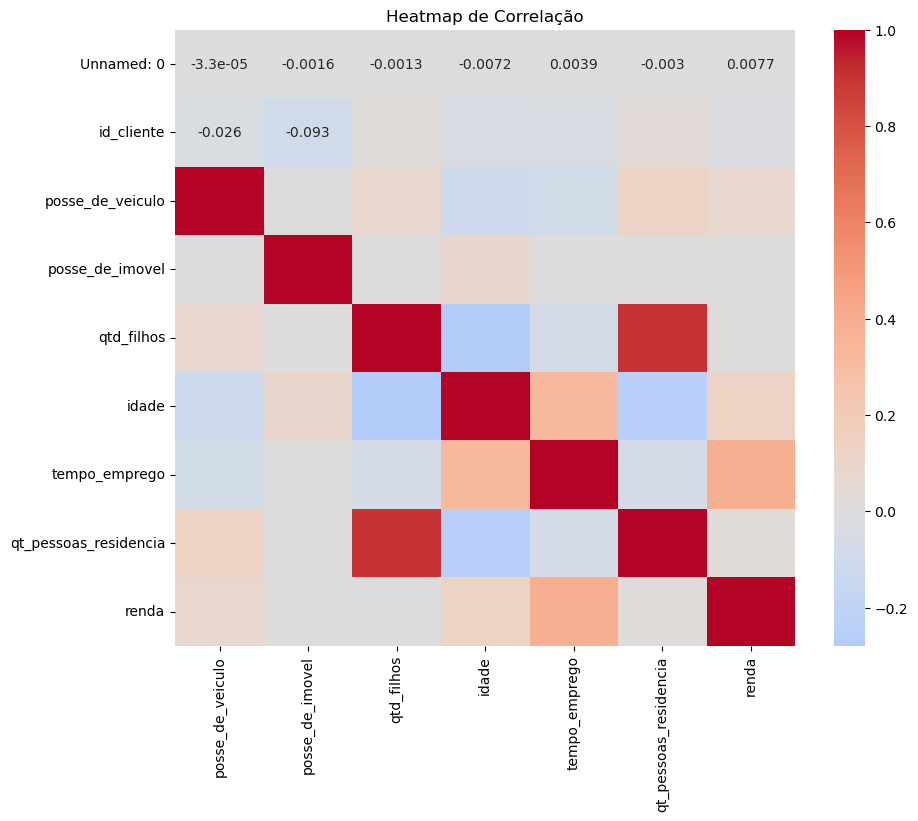

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

Através do Heatmap demonstrado acima, é possível percebermos com maior clareza quais variáveis são diretamente correlacionadas umas com as outras e quais são mais correlacionadas com a métrica de renda de um indivíduo. Através destas informações, podemos começar a limpar os dados.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Iremos remover algumas colunas que não serão úteis para a nossa análise e para construirmos o modelo.

In [10]:
renda_df = (renda
    .drop(columns=['Unnamed: 0', 'id_cliente', 'data_ref'])
    .dropna(subset=['tempo_emprego'])
    .drop_duplicates()
    .reset_index(drop=True)
)

<span>Também iremos criar variáveis (features) que podem ser úteis para o treinamento do nosso modelo.</span>
</br>
<span>Neste caso, seria útil termos mais de uma maneira de explicar algumas features, por isso criei as novas features "Tempo de Emprego Idade Ratio" e "Log Renda".</span>

In [11]:
renda_df = (renda_df
    .assign(tempo_emprego_idade_ratio = lambda x: x['tempo_emprego'] / x['idade'])
    .assign(log_renda = lambda x: np.log(x['renda']))
)

### Abaixo se encontra um novo dicionário de dados, que inclui as alterações feitas até o momento.

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| sexo                    |  Sexo do cliente em questão                                      | object|
| posse_de_veiculo        |  Posse de veículo próprio ou não                                     | bool|
| posse_de_imovel         |  Posse de imóvel próprio ou não                                     | bool|
| qtd_filhos              |  A quantidade de filhos que o cliente possui                                      | int|
| tipo_renda              |  Empresário, Assalariado, Servidor Público, Pensionista ou Bolsista                                      | object|
| educacao                |  Primário, Secundário, Superior Incompleto, Superior Completo, ou Pós Graduação                                      | object|
| estado_civil            |  Solteiro, Casado, Viúvo, União ou Separado                                      | object|
| tipo_residencia         |  Casa, Governamental, Com os pais, Aluguel, Estúdio ou Comunitário                                      | object|
| idade                   |  Idade do cliente em questão                                      | int|
| tempo_emprego           |  Tempo de emprego (em anos) do cliente em questão                                      | float|
| qt_pessoas_residencia   |  Quantidade de pessoas vivendo na residência do cliente em questão                                      | float|
| renda                   |  Renda do cliente em questão (Variável dependente)                                      | float|
| tempo_emprego_idade_ratio                   |  Se trata da divisão do tempo de emprego pela idade do indivíduo. Valores tendem a ser mais altos para quem trabalhou mais e tem uma idade menor                                   | float|
| log_renda                   |      O logaritmo natural da renda do indivíduo. Esta métrica auxilia no maqueamento de outliers                               | float|

#### Iremos gerar um report atualizado

In [12]:
%%capture
(ProfileReport(renda_df, title="Profiling Report Renda (post-cleaning)", explorative=True)
        .to_file("./output/report_renda_post_cleaning.html"))

#### Iremos gerar um heatmap para identificar as novas relações entre as variáveis recém-criadas

C:\Users\Hanga\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


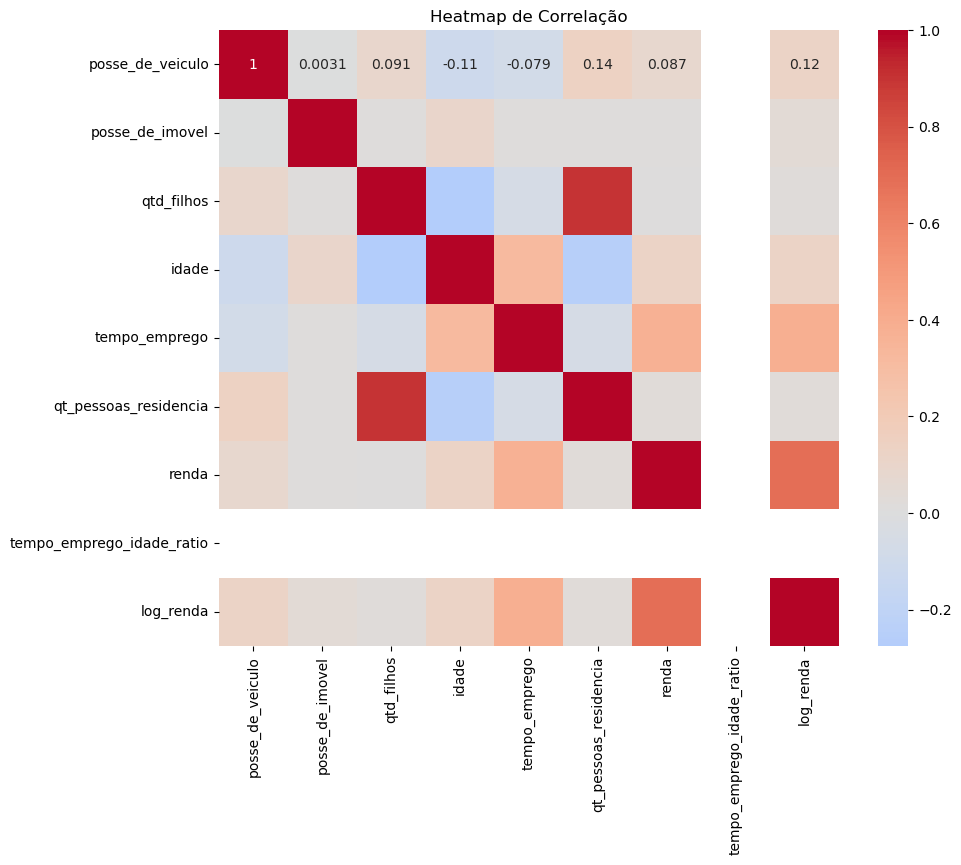

In [13]:
numeric_bool_df = renda_df.select_dtypes(include=['number', 'bool'])
numeric_bool_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_bool_df.dropna(inplace=True)
numeric_bool_df = numeric_bool_df.astype(int)
correlation_matrix = numeric_bool_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span>Para a modelagem, iremos utilizar a técnica de regressão múltipla, que é ideal para prevermos uma variável contínua em relação às diversas variáveis explicativas de diferentes formatos.</span>


In [107]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import patsy
from sklearn.metrics import r2_score

<span>Dividimos o DataSet em treino e teste</span>

In [108]:
train_df, test_df = train_test_split(renda_df, test_size=0.2, random_state=40)

<span>Selecionamos algumas features que possam fazer sentido inicialmente</span>

In [120]:
formula = (
    'log_renda ~ '
    'C(sexo) + '
    'C(posse_de_veiculo) * C(posse_de_imovel) + '
    'qtd_filhos + '
    'C(tipo_renda) + '
    'C(posse_de_imovel) + '
    'C(educacao) + '
    'C(estado_civil) + '
    'C(tipo_residencia) + '
    'C(tipo_residencia) + '
    'idade + '
    'tempo_emprego + '
    'qt_pessoas_residencia + '
    'tempo_emprego_idade_ratio'
)

<span>Para fins de organização, realizamos uma segunda divisão, entre X e Y, com a ajuda da biblioteca Patsy</span>

In [121]:
y_train, X_train= patsy.dmatrices(formula_like=formula, data=train_df)
y_test, X_test = patsy.dmatrices(formula_like=formula, data=test_df)

<span>Para evitar parte do fardo de testar manualmente cada valor de alpha com o objetivo de achar o maior R quadrado para a fórmula que definimos, implementamos um loop que itera em uma lista com alguns valores para o ALPHA, aplicando os valores tanto em um modelo Ridge quanto em um modelo Lasso.</span>

In [122]:
## Ridge e Lasso

alphas = [0,0.001,0.005,0.01,0.05,0.1]
r2_ridge = []
r2_lasso = []

for alpha in alphas:
    
    modelo = sm.OLS(y_train, X_train)
    
    reg_ridge = modelo.fit_regularized(method='elastic_net',
                                     refit=True,
                                     L1_wt=0, #ridge
                                     alpha = alpha)
    
    reg_lasso = modelo.fit_regularized(method='elastic_net',
                                     refit=True,
                                     L1_wt=1, #Lasso
                                     alpha = alpha)
    
    y_pred_ridge = reg_ridge.predict(X_test)
    y_pred_lasso = reg_lasso.predict(X_test)
    aux = r2_score(y_test, y_pred_ridge)
    tmp = r2_score(y_test, y_pred_lasso)
    
    r2_ridge.append(aux)
    r2_lasso.append(tmp)

<span>Agora iremos visualizar a relação entre o alpha e os modelos treinados em Lasso e Ridge</span>

In [123]:
tab = pd.DataFrame({'alpha':alphas,
              'R2 (Ridge)': r2_ridge,  'R2 (Lasso)': r2_lasso})

tab

,alpha,R2 (Ridge),R2 (Lasso)
0,0.000,0.331408,0.331408
1,0.001,0.328008,0.322532
2,0.005,0.314692,0.321282
3,0.010,0.296219,0.318812
4,0.050,0.101738,0.315034
5,0.100,-0.163847,0.315084


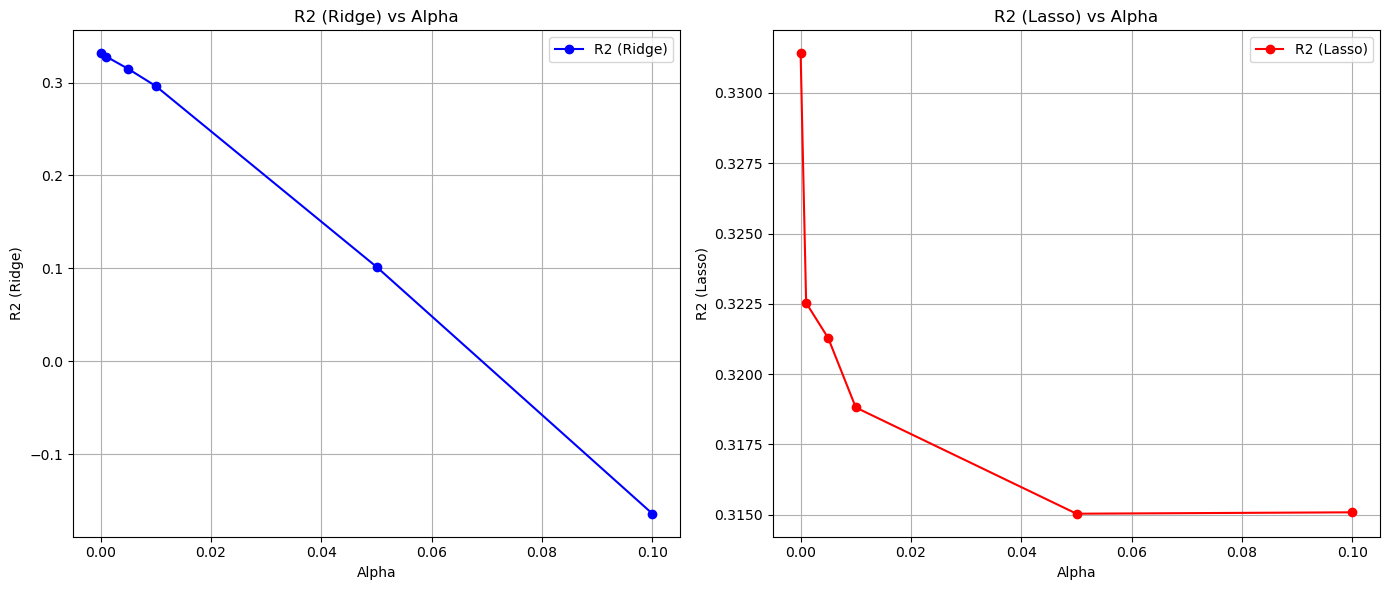

In [125]:
# Ridge
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(tab['alpha'], tab['R2 (Ridge)'], marker='o', linestyle='-', color='b', label='R2 (Ridge)')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R2 (Ridge)')
axes[0].set_title('R2 (Ridge) vs Alpha')
axes[0].legend()
axes[0].grid(True)

# Lasso
axes[1].plot(tab['alpha'], tab['R2 (Lasso)'], marker='o', linestyle='-', color='r', label='R2 (Lasso)')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('R2 (Lasso)')
axes[1].set_title('R2 (Lasso) vs Alpha')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
reg.summary()

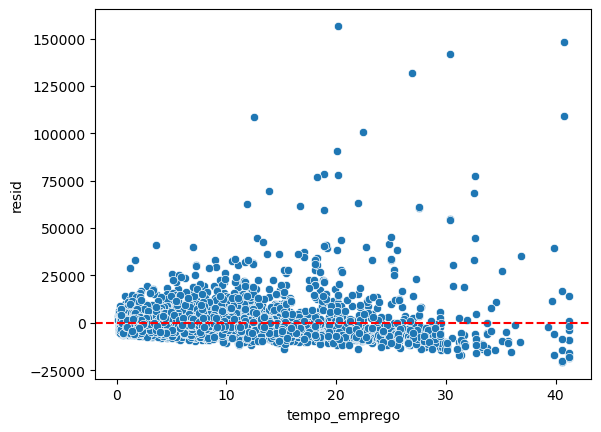

In [30]:
train_df['resid'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'resid', data = train_df)
plt.axhline(y=0, color='r', linestyle='--')

### Rodando o modelo


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.